## HT4 - Proyecto 2. Entrega 2
### Árboles de Decisión
Diego Duarte 22075 - José Marchena 22398

In [59]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.stats.diagnostic as diag
import statsmodels.api as sm
import regresion


#### Árboles de Regresión

In [60]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#Importar Datos
house_prices=pd.read_csv("train.csv")

print(house_prices.isnull().sum())

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [61]:
X = regresion.trans_categorical(house_prices).dropna()
house_prices.info()
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [62]:
from sklearn.model_selection import train_test_split

# Separar la variable objetivo (SalePrice)
y = np.log(X.pop("SalePrice"))

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, train_size=0.7, random_state=42
)

# Verificar tamaños de los conjuntos
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)



(770, 57)
(330, 57)
(770,)
(330,)


In [63]:
from sklearn.compose import make_column_selector as selector

numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

numerical_columns = numerical_columns_selector(X)
categorical_columns = categorical_columns_selector(X)
categorical_columns

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'ExterQual',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [64]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

categorical_preprocessor = OneHotEncoder(handle_unknown="ignore")
numerical_preprocessor = StandardScaler() 

preprocessor = ColumnTransformer([
    ('one-hot-encoder', categorical_preprocessor, categorical_columns),
    ('scaler', numerical_preprocessor, numerical_columns) 
])


In [65]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {"regressor__max_depth": np.arange(2, 10, 1)} # sobre qué numero de max-depth vamos a iterar
pipeline = Pipeline(
    [('preprocessor',preprocessor),
     ('regressor',DecisionTreeRegressor())]) # probamos múltiples modelos con el preprocessor previo
params = [{
    "regressor__max_depth": np.arange(2, 10, 1)
}]

modelo1 = GridSearchCV(pipeline, param_grid=params, n_jobs=2, cv=2,scoring="neg_root_mean_squared_error") # evaluamos usando CV para ver cuál es el mejor modelo de todos 
modelo1.fit(X_train,y_train)
modelo1.best_params_

{'regressor__max_depth': 6}

In [66]:
modelo1_pred = modelo1.predict(X_test)
modelo1_pred


array([11.43651085, 12.4314705 , 11.74724285, 12.1948488 , 11.87725841,
       11.79244896, 11.79244896, 13.23049313, 11.74724285, 12.4314705 ,
       11.74724285, 11.68236108, 11.9757578 , 11.46066601, 12.77509596,
       12.35725977, 12.10154989, 11.9757578 , 11.41861479, 12.53567621,
       12.1948488 , 12.60448939, 11.90142336, 12.17029965, 11.9757578 ,
       11.46066601, 11.79244896, 12.57138281, 11.9757578 , 11.84573297,
       11.99645715, 12.41026913, 11.74724285, 12.2982023 , 10.98944094,
       12.2982023 , 11.99645715, 12.12675884, 12.01380185, 10.98944094,
       11.68236108, 13.02695677, 11.90142336, 12.4314705 , 11.74724285,
       12.61923725, 11.74724285, 11.74724285, 11.99645715, 12.60448939,
       12.1948488 , 11.74724285, 12.60448939, 12.1948488 , 12.1948488 ,
       12.2982023 , 12.77509596, 11.90142336, 11.74724285, 11.99645715,
       11.40756495, 12.01380185, 12.2982023 , 12.17029965, 11.87725841,
       11.42409425, 12.17029965, 12.4314705 , 11.74724285, 11.99

In [67]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, modelo1_pred)
print(f"MAE: {mae:.4f}")

mse = mean_squared_error(y_test, modelo1_pred)
print(f"MSE: {mse:.4f}")

MAE: 0.1386
MSE: 0.0342


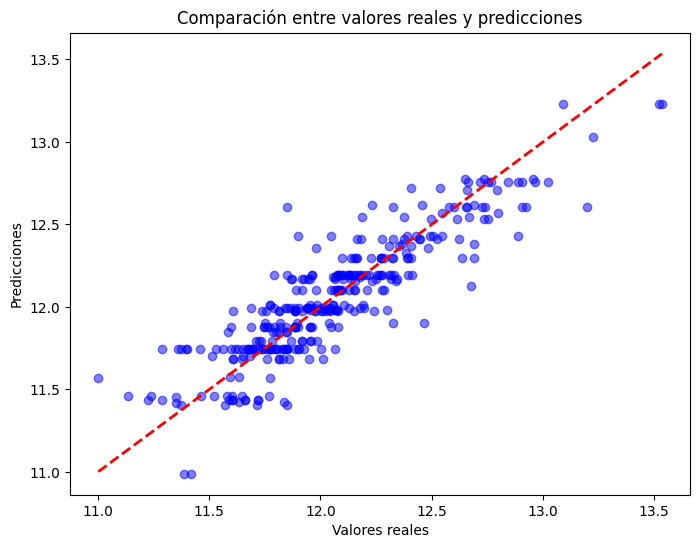

In [68]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, modelo1_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Línea diagonal
plt.title("Comparación entre valores reales y predicciones")
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.show()

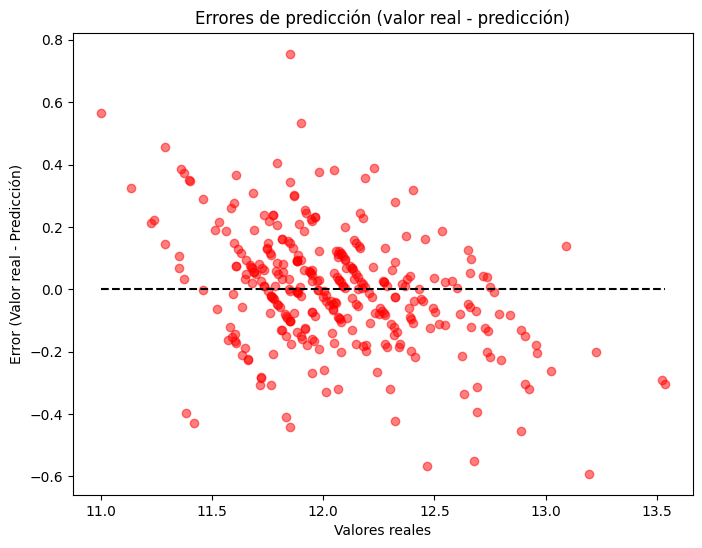

In [69]:
errores = modelo1_pred - y_test
plt.figure(figsize=(8, 6))
plt.scatter(y_test, errores, color='red', alpha=0.5)
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max(), colors='black', linestyles='dashed')
plt.title("Errores de predicción (valor real - predicción)")
plt.xlabel("Valores reales")
plt.ylabel("Error (Valor real - Predicción)")
plt.show()

In [70]:
param_grids = [
    {"regressor__max_depth": np.arange(10, 21, 1)},  # Segundo modelo: max_depth de 10 a 20
    {"regressor__max_depth": np.arange(1, 6, 1)},    # Tercer modelo: max_depth de 1 a 5
    {"regressor__max_depth": np.arange(5, 16, 1)}    # Cuarto modelo: max_depth de 5 a 15
]

In [71]:
modelos_resultados = []

# Realizar GridSearchCV con los diferentes rangos de max_depth
for param_grid in param_grids:
    modelo = GridSearchCV(pipeline, param_grid=param_grid, n_jobs=2, cv=2, scoring="neg_root_mean_squared_error")
    modelo.fit(X_train, y_train)
    modelos_resultados.append(modelo)
    print(f"Mejores parámetros para rango {param_grid['regressor__max_depth'][0]}-{param_grid['regressor__max_depth'][-1]}: {modelo.best_params_}")

Mejores parámetros para rango 10-20: {'regressor__max_depth': 17}
Mejores parámetros para rango 1-5: {'regressor__max_depth': 4}
Mejores parámetros para rango 5-15: {'regressor__max_depth': 7}


Modelo 1 - Parámetros:
{'regressor__max_depth': 17}
Modelo 1 - MAE: 0.1457
Modelo 1 - MSE: 0.0388


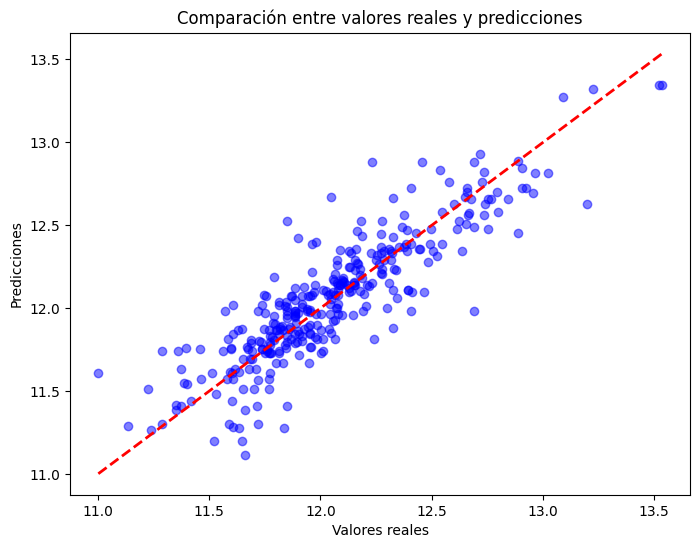

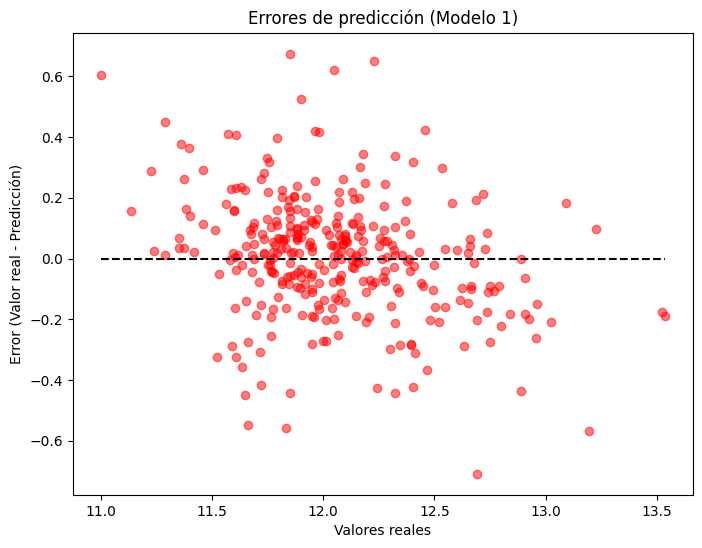

Modelo 2 - Parámetros:
{'regressor__max_depth': 4}
Modelo 2 - MAE: 0.1509
Modelo 2 - MSE: 0.0410


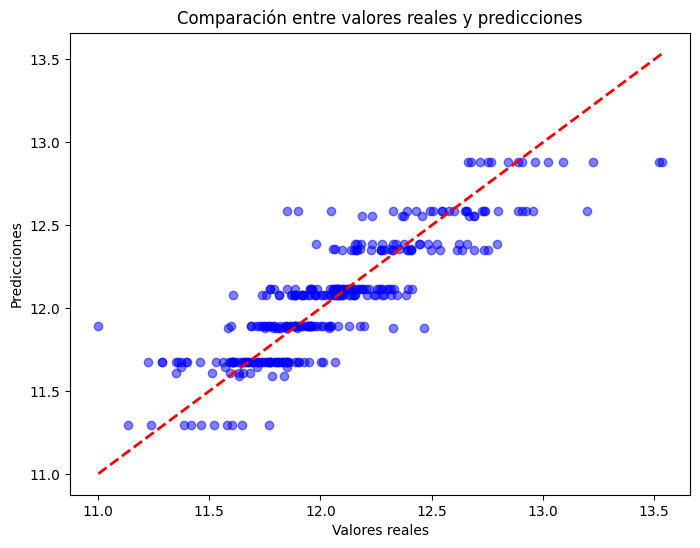

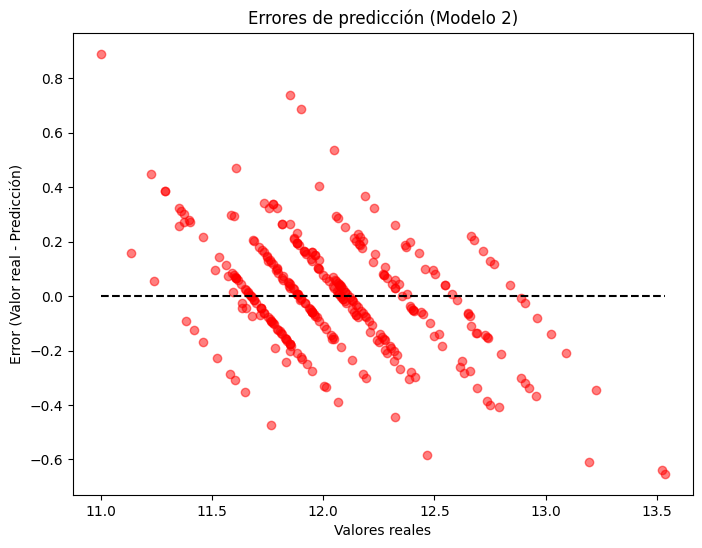

Modelo 3 - Parámetros:
{'regressor__max_depth': 7}
Modelo 3 - MAE: 0.1329
Modelo 3 - MSE: 0.0333


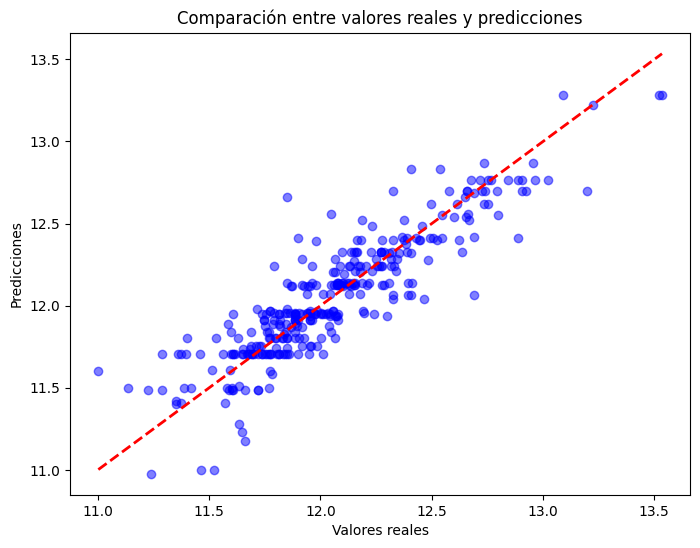

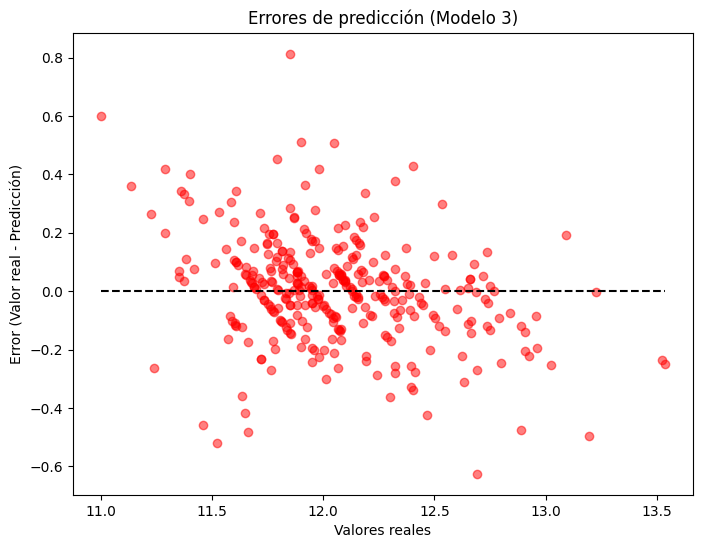

In [72]:
for i, modelo in enumerate(modelos_resultados):
    print(f"Modelo {i+1} - Parámetros:")
    print(modelo.best_params_)
    
    # Predicciones para el modelo i
    modelo = modelo.predict(X_test)
    
    # Calcular MAE y MSE
    mae = mean_absolute_error(y_test, modelo)
    print(f"Modelo {i+1} - MAE: {mae:.4f}")

    mse = mean_squared_error(y_test, modelo)
    print(f"Modelo {i+1} - MSE: {mse:.4f}")

    # Comparación entre valores reales y predicciones
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, modelo, color='blue', alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Línea diagonal
    plt.title("Comparación entre valores reales y predicciones")
    plt.xlabel("Valores reales")
    plt.ylabel("Predicciones")
    plt.show()

    # Errores de predicción (valor real - predicción)
    errores = modelo - y_test
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, errores, color='red', alpha=0.5)
    plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max(), colors='black', linestyles='dashed')
    plt.title(f"Errores de predicción (Modelo {i+1})")
    plt.xlabel("Valores reales")
    plt.ylabel("Error (Valor real - Predicción)")
    plt.show()

In [73]:
MAE_Prev = 15345
MSE_Prev = 3.83e+7

modelo_seleccionado = modelos_resultados[2]
modelo_pred = modelo_seleccionado.predict(X_test)

# Exponenciar las predicciones y los valores reales (recordando que estaban en escala logarítmica)
modelo_pred_exp = np.exp(modelo_pred)
y_test_exp = np.exp(y_test)

# Calcular MAE y MSE en la escala original
mae_exp = mean_absolute_error(y_test_exp, modelo_pred_exp)
mse_exp = mean_squared_error(y_test_exp, modelo_pred_exp)

print(f"MAE Exponenciado: {mae_exp:.4f}")
print(f"MSE Exponenciado: {mse_exp:.4f}")

MAE Exponenciado: 24933.0523
MSE Exponenciado: 1495869206.3752


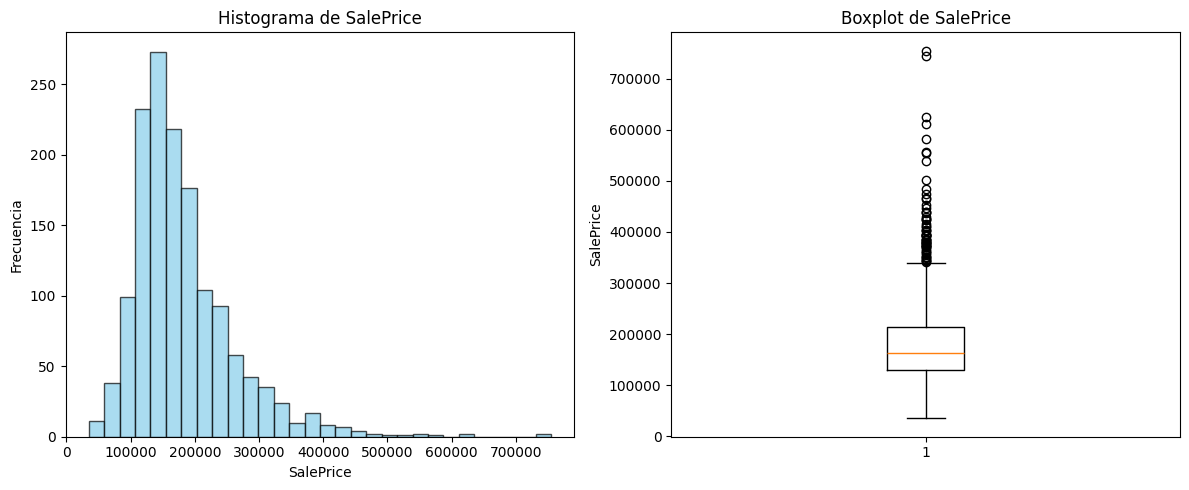

### CLASSIFICATION TREE

#### Agrupamiento

C:\Users\JM\AppData\Local\Temp\ipykernel_42596\2896332112.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_set['Cluster'] = km.fit_predict(X_pca)


InvalidIndexError: (slice(None, None, None), 0)

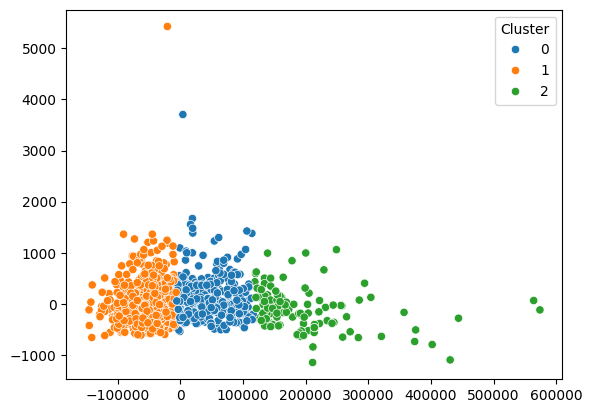

In [ ]:
from sklearn.decomposition import PCA
import sklearn
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
from sklearn import tree
cluster_set = house_prices[['GrLivArea', 'SalePrice','1stFlrSF','GarageArea']]
cluster_set.dropna()

cluster_amount = 3
X_pca = PCA(n_components=2).fit_transform(cluster_set)
km = sklearn.cluster.KMeans(n_clusters=cluster_amount, random_state=42).fit(X_pca)

cluster_set['Cluster'] = km.fit_predict(X_pca)
centroides = cluster_set.groupby('Cluster')['SalePrice'].mean().reset_index()

sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=cluster_set['Cluster'], palette="tab10", legend="full")
# Plot centroids
plt.scatter(centroides[:, 0], centroides[:, 1], c='red', marker='X', s=200, label="Centroids")

plt.title(f"K-Means Clustering (Reducido con PCA) - 4 Clusters")
plt.legend()
plt.show()

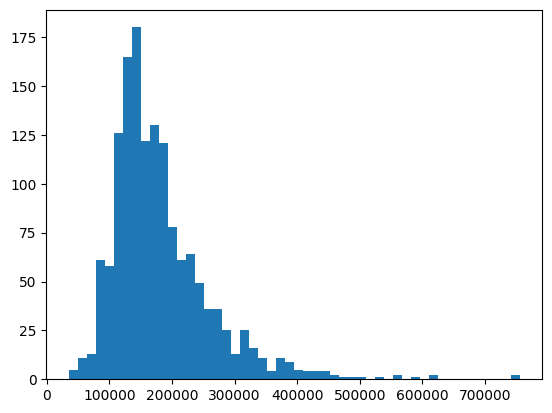

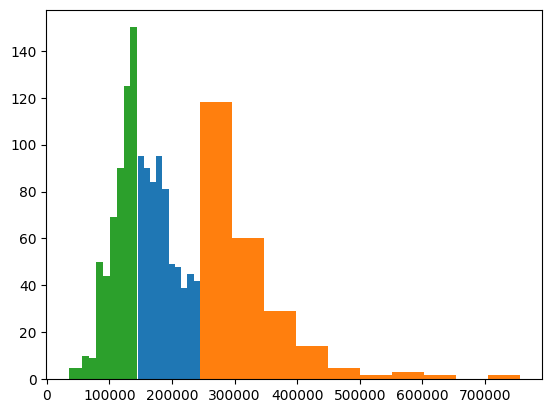

In [179]:

plt.hist(cluster_set['SalePrice'], bins=50)
plt.show()
for i in range(3):
    sp_i = cluster_set[cluster_set['Cluster']==i]
    plt.hist(sp_i['SalePrice'])

In [180]:
tem = house_prices[house_prices.columns]
object_cols = tem.select_dtypes(include=['object']).columns
fuzzy_hp = pd.get_dummies(tem, columns=object_cols, drop_first=True)
fuzzy_hp['SpThird'] = cluster_set['Cluster']
fuzzy_hp.pop('SalePrice')
fuzzy_hp.groupby('SpThird').size()

SpThird
0    668
1    235
2    557
dtype: int64

In [181]:
y = fuzzy_hp.pop('SpThird')
X_ct = fuzzy_hp
X_train, X_test, y_train, y_test = train_test_split(
    X_ct, y, test_size=0.3, train_size=0.7, random_state=42
)


In [182]:
arbol = DecisionTreeClassifier(criterion="gini", max_depth=2, random_state=42) 
arbol = arbol.fit(X_train, y_train) 

[Text(0.5, 0.8333333333333334, 'OverallQual <= 5.5\ngini = 0.617\nsamples = 1021\nvalue = [477, 164, 380]\nclass = 0'),
 Text(0.25, 0.5, '1stFlrSF <= 1069.5\ngini = 0.354\nsamples = 358\nvalue = [81, 1, 276]\nclass = 2'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'gini = 0.155\nsamples = 224\nvalue = [19, 0, 205]\nclass = 2'),
 Text(0.375, 0.16666666666666666, 'gini = 0.505\nsamples = 134\nvalue = [62, 1, 71]\nclass = 2'),
 Text(0.75, 0.5, 'OverallQual <= 7.5\ngini = 0.558\nsamples = 663\nvalue = [396, 163, 104]\nclass = 0'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'gini = 0.446\nsamples = 500\nvalue = [355, 42, 103]\nclass = 0'),
 Text(0.875, 0.16666666666666666, 'gini = 0.386\nsamples = 163\nvalue = [41.0, 121.0, 1.0]\nclass = 1')]

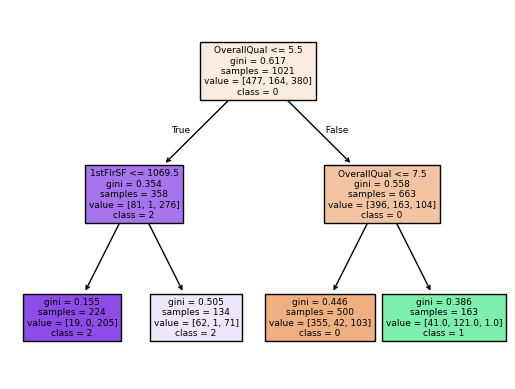

In [183]:
tree.plot_tree(arbol,feature_names=fuzzy_hp.columns,
               class_names=['0','1','2'],filled=True )

In [184]:
y_pred = arbol.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy:.2f}")

# Reporte de clasificación
print(classification_report(y_test, y_pred))

Precisión del modelo: 0.75
              precision    recall  f1-score   support

           0       0.71      0.72      0.72       190
           1       0.80      0.75      0.77        71
           2       0.78      0.79      0.78       177

    accuracy                           0.75       438
   macro avg       0.76      0.75      0.76       438
weighted avg       0.75      0.75      0.75       438



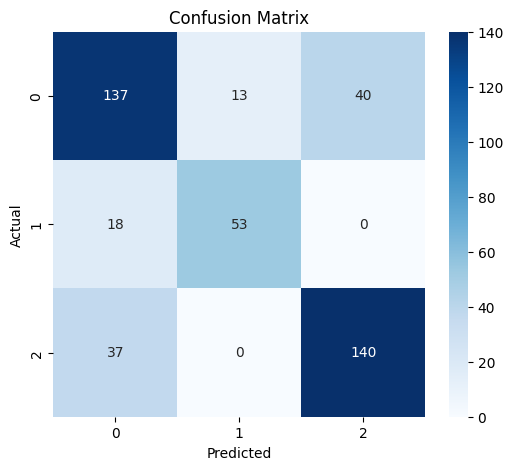

In [185]:
# Step 2: Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Step 3: Plot confusion matrix using Seaborn
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()